## Please see line 616 for confusion matrix.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
import graphviz
import pydotplus

%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn import metrics

import decimal

In [141]:
import tensorflow as tf
from keras import datasets
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical, plot_model
from keras import models
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dense
import tensorflow_probability as tfp
from keras.optimizers import Adam
from keras.layers import Dropout

Import Dataset

In [391]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df = df.rename(columns={0:"sepal length (cm)", 1:"sepal width (cm)", 2:"petal length (cm)", 3:"petal width (cm)", 4:"class"})
df.columns = df.columns.str.replace(' ', '_')

In [392]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Vizualizing the Dataset
The next step is to visualize the dataset to capture the relationships between the features and the associated classes.

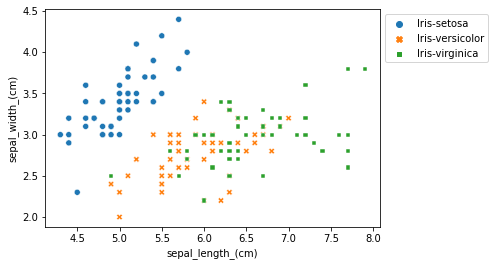

In [144]:
sns.scatterplot(x='sepal_length_(cm)', y='sepal_width_(cm)',
                hue='class', style='class', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

From the graph above we can see, one of the classes(Iris-Setosa) are easily linearly separable from the other two based on its sepal lengh, and width, However, the latter two(Iris-versicolor and Iris-Virginica) are not so easily separable from each other. That creates a challenge of how can we come up with a Machine learning model that can accurately predict the species of the flower given the challenge mentioned above. 

### Turing the categorical label columns into 3 individual binary columns.  

In [393]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
df = create_dummies(df,"class")

In [394]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


Select the feature columns:

In [395]:
x_features = df.columns[0:2]
y_features = df.columns[5:]

Confirminig the feature columns names:

In [396]:
x_features, y_features

(Index(['sepal_length_(cm)', 'sepal_width_(cm)'], dtype='object'),
 Index(['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica'], dtype='object'))

In [397]:
X = df[x_features]
y = df[y_features]

In [613]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

<hr>

# Models

## SVM Model with Linear Kernel

In [251]:
#only extracting the class column for each example. The other columns will be used in the NN. 
listt = [] 
for i in X_train.index:
    listt.append(df.iloc[i]['class'])
y_train = listt

In [111]:
SVM_model = SVC(kernel='linear', random_state=30)
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=30)

In [112]:
accuracy = round(SVM_model.score(X_train, y_train),2)
print(accuracy)

0.84


| Architenture| Model Accuracy | Test Accuracy | 
| ----------- | ---------------|-------------- |
| SVM(Liniar)      | 84%       |-- |

<hr> 

# Sequential NN Model:

In [399]:
epochs= 100

#### Let us first build the model using only one layer with 'relu' activation function

In [614]:
model = models.Sequential()

model.add(Dense(4, 
                input_shape=(2,),
                activation='relu'))
# model.add(Dense(6,
#                 input_shape=(2,),
#                 activation='relu'))

# model.add(Dropout(0.2, input_shape=(2,)))

model.add(Dense(3,activation='softmax'))

model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 4)                 12        
                                                                 
 dense_152 (Dense)           (None, 3)                 15        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


The softmax activation function is used in the last layer of the model primarily for classification problems. Since we have 3 classes of flowers, the final layer has 3 neurons and the softmax produces 3 outputs with 3 probabilities indicating the probability of that particular flower belonging to a particular class. The class with the maximum probability will be selected as the predicted class.

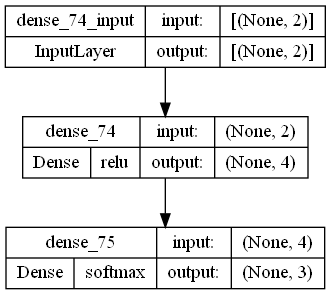

In [401]:
plot_model(model, to_file='oo.png', show_shapes=True, show_layer_names=True, show_layer_activations= True)

In [410]:
history = model.fit(X_train,y_train, 
          epochs=epochs,
          validation_data=(X_test,y_test))

Epoch 1/100
4/4 [==============================] - 0s 54ms/step - loss: 1.6291 - accuracy: 0.3333 - val_loss: 1.3517 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0892 - accuracy: 0.3500 - val_loss: 0.9800 - val_accuracy: 0.2667
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8735 - accuracy: 0.5667 - val_loss: 0.8902 - val_accuracy: 0.6667
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8848 - accuracy: 0.6500 - val_loss: 0.8969 - val_accuracy: 0.6333
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8948 - accuracy: 0.6417 - val_loss: 0.8806 - val_accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8610 - accuracy: 0.6583 - val_loss: 0.8514 - val_accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8184 - accuracy: 0.6583 - val_loss: 0.8256 - val_accuracy: 0.6667
Epoch 8/100
4/4 [====

4/4 [==============================] - 0s 13ms/step - loss: 0.5210 - accuracy: 0.7250 - val_loss: 0.4653 - val_accuracy: 0.7000
Epoch 60/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5186 - accuracy: 0.7333 - val_loss: 0.4613 - val_accuracy: 0.7333
Epoch 61/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5173 - accuracy: 0.7000 - val_loss: 0.4572 - val_accuracy: 0.7333
Epoch 62/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5192 - accuracy: 0.7167 - val_loss: 0.4556 - val_accuracy: 0.7333
Epoch 63/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5166 - accuracy: 0.7250 - val_loss: 0.4554 - val_accuracy: 0.7333
Epoch 64/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5164 - accuracy: 0.7167 - val_loss: 0.4537 - val_accuracy: 0.7333
Epoch 65/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5128 - accuracy: 0.7333 - val_loss: 0.4567 - val_accuracy: 0.6667
Epoch 66/100
4/4 [==========

#### Making a function to plot the accuracy score of the tranning and vaidation set.

In [364]:
def plot_accuracy(history):
    # plot the acccuracy

    plt.figure(figsize=(8,8))
    plt.plot(history.history['accuracy'], label='training accuracy',color='blue')
    try:
        plt.plot(history.history['val_accuracy'], label = 'validation accuracy',color='red')
    except:
        pass
    plt.title('Accuracy by Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    #plt.ylim([0.5, .85])
    plt.legend(loc='lower right')

#### Making a function to plot the loss score of the tranning and vaidation set.

In [365]:
def plot_loss(history):
    # plot the loss

    plt.figure(figsize=(8,8))
    plt.plot(history.history['loss'], label='training categorical cross-entropy', color='blue')
    try:
        plt.plot(history.history['val_loss'], label='validation categorical cross-entropy', color='red')
    except:
        pass
    plt.title('Loss by Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    #plt.ylim([0.0, .1])
    plt.legend(loc='upper right')

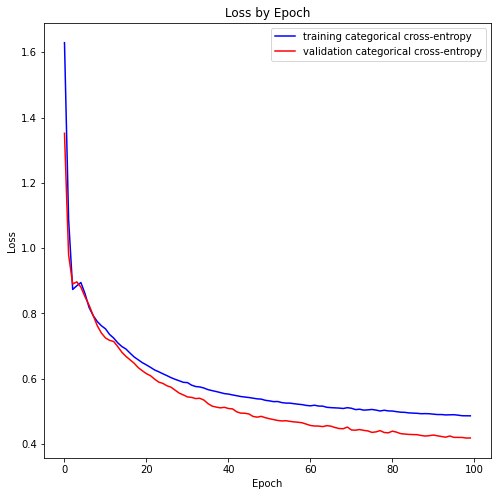

In [412]:
# plot the loss
plot_loss(history)

From the graph, we can see the loss has been decreasing steadily over a period of time. The validation accuracy is increasing much faster than the training accuracy. It could be because the testing data may have more examples of Iris-Setosa which is easy to predict or in other words linearly separable. 

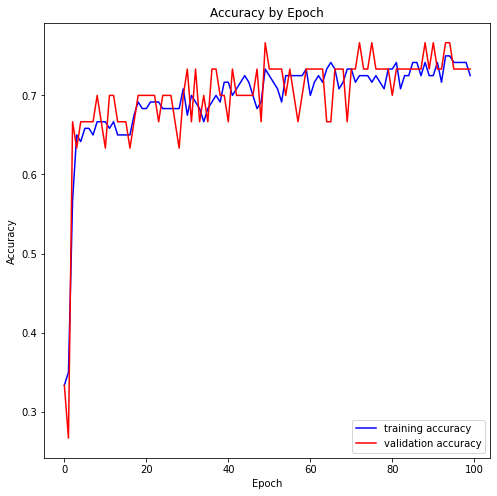

In [413]:
# plot the acccuracy
plot_accuracy(history)

Let us now evaluate our tranning and testing dataset using the builtin evaluate() function. It Returns the loss value & accuracy values for the model for the given dataset.

In [414]:
model.evaluate(X_train, y_train)

4/4 [==============================] - 0s 0s/step - loss: 0.4846 - accuracy: 0.7500


[0.4846288561820984, 0.75]

In [415]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.4189 - accuracy: 0.7333


[0.41885003447532654, 0.7333333492279053]

| Architenture| Model Accuracy | Test Accuracy | 
| ----------- | ---------------|-------------- |
| SVM(Liniar)      | 84%       |-- |
| 3 Layer NN      | 75%       |73% |

## No Free Lunch

In my CSc 322 class, I have learned an interesting theorem called 'No free lunch' theorem for machine learning, which states that, "any given algorithm can solve some classes of problems well but can’t solve some other classes at all. This means that, for any given problem, a specific neural network architecture could be effective, while another will not function well, if at all." 
So, I want to built a few different architectures to see if some other NN model can provide a better answer.

## Using Entire Dataset

In [606]:
print(X.shape, y.shape)

(150, 2) (150, 3)


In [615]:
history = model.fit(X,y, 
          epochs=epochs,)

Epoch 1/200
5/5 [==============================] - 0s 4ms/step - loss: 2.2674 - accuracy: 0.3333
Epoch 2/200
5/5 [==============================] - 0s 0s/step - loss: 1.6957 - accuracy: 0.3133
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4512 - accuracy: 0.3333
Epoch 4/200
5/5 [==============================] - 0s 0s/step - loss: 1.2589 - accuracy: 0.3333
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 1.1811 - accuracy: 0.2400
Epoch 6/200
5/5 [==============================] - 0s 0s/step - loss: 1.1547 - accuracy: 0.1200
Epoch 7/200
5/5 [==============================] - 0s 0s/step - loss: 1.1434 - accuracy: 0.1333
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 1.1358 - accuracy: 0.3267
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1212 - accuracy: 0.3333
Epoch 10/200
5/5 [==============================] - 0s 223us/step - loss: 1.1128 - accuracy: 0.2933
Epoch 11/200
5/5 [=============

5/5 [==============================] - 0s 0s/step - loss: 0.5909 - accuracy: 0.7400
Epoch 86/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5838 - accuracy: 0.7533
Epoch 87/200
5/5 [==============================] - 0s 0s/step - loss: 0.5802 - accuracy: 0.7400
Epoch 88/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.7333
Epoch 89/200
5/5 [==============================] - 0s 0s/step - loss: 0.5704 - accuracy: 0.7467
Epoch 90/200
5/5 [==============================] - 0s 0s/step - loss: 0.5731 - accuracy: 0.7733
Epoch 91/200
5/5 [==============================] - 0s 0s/step - loss: 0.5673 - accuracy: 0.7600
Epoch 92/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5643 - accuracy: 0.7333
Epoch 93/200
5/5 [==============================] - 0s 0s/step - loss: 0.5573 - accuracy: 0.7400
Epoch 94/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5549 - accuracy: 0.7400
Epoch 95/200
5/5 [=====================

5/5 [==============================] - 0s 0s/step - loss: 0.4653 - accuracy: 0.7733
Epoch 169/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.7733
Epoch 170/200
5/5 [==============================] - 0s 0s/step - loss: 0.4661 - accuracy: 0.7733
Epoch 171/200
5/5 [==============================] - 0s 0s/step - loss: 0.4647 - accuracy: 0.7800
Epoch 172/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4626 - accuracy: 0.7800
Epoch 173/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7800
Epoch 174/200
5/5 [==============================] - 0s 0s/step - loss: 0.4634 - accuracy: 0.7667
Epoch 175/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4625 - accuracy: 0.7800
Epoch 176/200
5/5 [==============================] - 0s 0s/step - loss: 0.4622 - accuracy: 0.7733
Epoch 177/200
5/5 [==============================] - 0s 0s/step - loss: 0.4605 - accuracy: 0.7800
Epoch 178/200
5/5 [===========

In [442]:
model.evaluate(X, y)

5/5 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.7800


[0.5278337001800537, 0.7799999713897705]

| Architenture| Model Accuracy | Test Accuracy | 
| ----------- | ---------------|-------------- |
| SVM(Liniar)      | 84%       |-- |
| 3 Layer NN      | 75%       |73% |
| 3 Layer NN(Full Dataset)   | 78%        |77% |

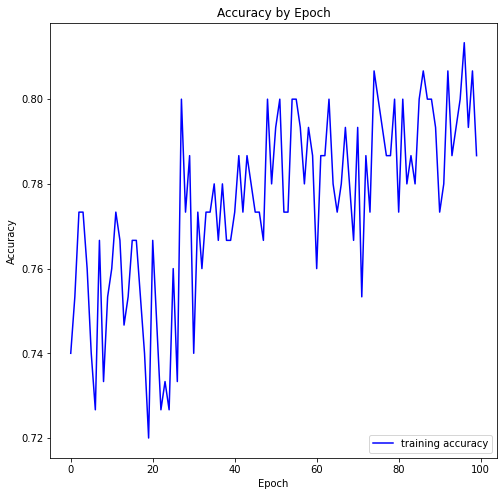

In [418]:
plot_accuracy(history)

The Accuracy score of the model has some interesting outcome over time. The trainning accuracy has a lot of fluctuation. It started as low and gradually gets better over time.

#### Using the full dataset, the accuracy of the model increased slightly. It could be because of sheer chance. Or it also could be because of a larger dataset the model was able to do better.

<hr>

## Let's try with an additional layer to see if we can do any better.

In [585]:
model = models.Sequential()
model.add(Dense(4, input_shape=(2,),activation='relu'))

model.add(Dense(6,
                input_shape=(2,),
                activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

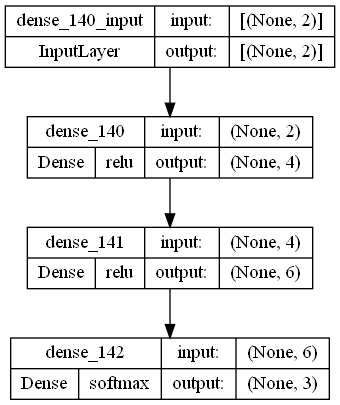

In [586]:
plot_model(model, to_file='oo.png', show_shapes=True, show_layer_names=True, show_layer_activations= True)

Now we have,...<br>
1 input layer with 2 input features, 
<br> 
2 dense layers with 4 and 6 nodes, and <br> 
1 output layer. 

#### Since we have already seen that the model performs well with the full dataset, let's choose the entire dataset for the next model

In [576]:
history = model.fit(X,y, 
          epochs=100,
          )

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0874 - accuracy: 0.3467
Epoch 2/100
5/5 [==============================] - 0s 0s/step - loss: 1.0485 - accuracy: 0.4200
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0349 - accuracy: 0.3667
Epoch 4/100
5/5 [==============================] - 0s 0s/step - loss: 1.0148 - accuracy: 0.3333
Epoch 5/100
5/5 [==============================] - 0s 0s/step - loss: 0.9961 - accuracy: 0.5467
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9722 - accuracy: 0.5800
Epoch 7/100
5/5 [==============================] - 0s 0s/step - loss: 0.9448 - accuracy: 0.6067
Epoch 8/100
5/5 [==============================] - 0s 0s/step - loss: 0.9081 - accuracy: 0.6533
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8630 - accuracy: 0.6467
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8112 - accuracy: 0.6867
Epoch 11/100
5/5 [================

5/5 [==============================] - 0s 0s/step - loss: 0.4454 - accuracy: 0.7467
Epoch 86/100
5/5 [==============================] - 0s 0s/step - loss: 0.4492 - accuracy: 0.7533
Epoch 87/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.7533
Epoch 88/100
5/5 [==============================] - 0s 0s/step - loss: 0.4423 - accuracy: 0.7400
Epoch 89/100
5/5 [==============================] - 0s 0s/step - loss: 0.4430 - accuracy: 0.7733
Epoch 90/100
5/5 [==============================] - 0s 0s/step - loss: 0.4404 - accuracy: 0.7800
Epoch 91/100
5/5 [==============================] - 0s 0s/step - loss: 0.4407 - accuracy: 0.7667
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.7467
Epoch 93/100
5/5 [==============================] - 0s 0s/step - loss: 0.4396 - accuracy: 0.7533
Epoch 94/100
5/5 [==============================] - 0s 0s/step - loss: 0.4368 - accuracy: 0.7800
Epoch 95/100
5/5 [=======================

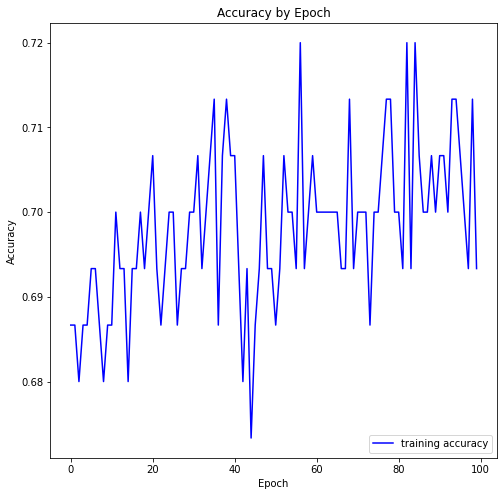

In [509]:
plot_accuracy(history)

In [518]:
model.evaluate(X, y)

5/5 [==============================] - 0s 4ms/step - loss: 0.4239 - accuracy: 0.8067


[0.42386937141418457, 0.8066666722297668]

In [577]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.5682 - accuracy: 0.6333


[0.5682273507118225, 0.6333333253860474]

| Architenture| Model Accuracy | Test Accuracy | 
| ----------- | ---------------|-------------- |
| SVM(Liniar)      | 84%       |-- |
| 3 Layer NN      | 75%       |73% |
| 3 Layer NN(Full Dataset)   | 78%        |77% |
| 4 Layer NN(Full Dataset)   | 80%        |63% |

<hr> 

### Let us now increase the epoch size using the same 4 layer sturcture defined right above:

In [587]:
epochs = 200
history = model.fit(X,y, 
          epochs=epochs,)

Epoch 1/200
5/5 [==============================] - 0s 0s/step - loss: 1.3478 - accuracy: 0.3333
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 1.1746 - accuracy: 0.2800
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 1.1394 - accuracy: 0.3333
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1107 - accuracy: 0.3333
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 1.0964 - accuracy: 0.3200
Epoch 6/200
5/5 [==============================] - 0s 0s/step - loss: 1.0928 - accuracy: 0.1800
Epoch 7/200
5/5 [==============================] - 0s 0s/step - loss: 1.0946 - accuracy: 0.2000
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 1.0907 - accuracy: 0.2467
Epoch 9/200
5/5 [==============================] - 0s 0s/step - loss: 1.0888 - accuracy: 0.3200
Epoch 10/200
5/5 [==============================] - 0s 0s/step - loss: 1.0856 - accuracy: 0.3333
Epoch 11/200
5/5 [================

5/5 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.7267
Epoch 86/200
5/5 [==============================] - 0s 0s/step - loss: 0.4622 - accuracy: 0.7200
Epoch 87/200
5/5 [==============================] - 0s 0s/step - loss: 0.4568 - accuracy: 0.7400
Epoch 88/200
5/5 [==============================] - 0s 0s/step - loss: 0.4621 - accuracy: 0.7267
Epoch 89/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4556 - accuracy: 0.7333
Epoch 90/200
5/5 [==============================] - 0s 0s/step - loss: 0.4592 - accuracy: 0.7333
Epoch 91/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4571 - accuracy: 0.7333
Epoch 92/200
5/5 [==============================] - 0s 0s/step - loss: 0.4551 - accuracy: 0.7333
Epoch 93/200
5/5 [==============================] - 0s 0s/step - loss: 0.4538 - accuracy: 0.7400
Epoch 94/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4537 - accuracy: 0.7667
Epoch 95/200
5/5 [=====================

5/5 [==============================] - 0s 0s/step - loss: 0.4177 - accuracy: 0.7867
Epoch 169/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4184 - accuracy: 0.7933
Epoch 170/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4164 - accuracy: 0.8000
Epoch 171/200
5/5 [==============================] - 0s 0s/step - loss: 0.4170 - accuracy: 0.8000
Epoch 172/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4165 - accuracy: 0.7933
Epoch 173/200
5/5 [==============================] - 0s 0s/step - loss: 0.4181 - accuracy: 0.7867
Epoch 174/200
5/5 [==============================] - 0s 0s/step - loss: 0.4164 - accuracy: 0.8067
Epoch 175/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4199 - accuracy: 0.7933
Epoch 176/200
5/5 [==============================] - 0s 0s/step - loss: 0.4170 - accuracy: 0.8000
Epoch 177/200
5/5 [==============================] - 0s 0s/step - loss: 0.4153 - accuracy: 0.8067
Epoch 178/200
5/5 [===========

In [556]:
model.evaluate(X, y)

5/5 [==============================] - 0s 0s/step - loss: 0.3974 - accuracy: 0.8133


[0.39737874269485474, 0.8133333325386047]

In [588]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 116ms/step - loss: 0.4911 - accuracy: 0.7667


[0.4911248981952667, 0.7666666507720947]

| Architenture| Model Accuracy | Test Accuracy | 
| ----------- | ---------------|-------------- |
| SVM(Liniar)      | 84%       |-- |
| 3 Layer NN      | 75%       |73% |
| 3 Layer NN(Full Dataset)   | 78%        |77% |
| 4 Layer NN(Full Dataset)   | 80%        |63% |
| 4 Layer NN(Full 200 Epochs)   | 81%        |76% |

#### We can see that the model accuracy has increased from 79% to 81% when we used large epoch number. 

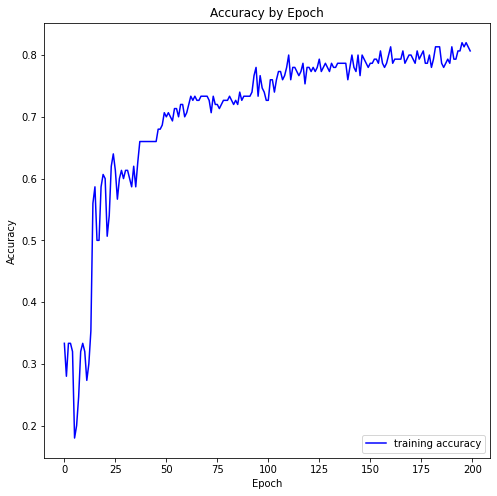

In [590]:
plot_accuracy(history)

## Confusion Matrix

### Make a prediction array with testing dataset to build a confusion matric to see where the model is confused the most. 

In [616]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

1/1 [==============================] - 0s 62ms/step


In [168]:
def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(10, 10))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i in range (cm.shape[0]):
    for j in range (cm.shape[1]):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure
    
  #Note the above code has been adopted and modied from Tensorflow: https://www.tensorflow.org/tensorboard/image_summaries

1/1 [==============================] - 0s 28ms/step


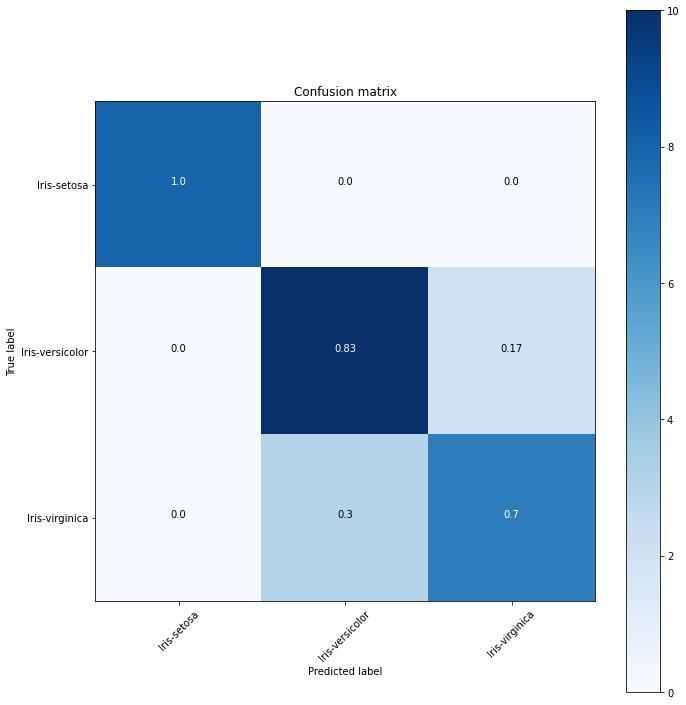

In [617]:
# Use the model to predict the values from the validation dataset.
from sklearn import metrics

test_pred_raw = model.predict(X_test)
test_pred = np.argmax(test_pred_raw, axis=1)

# Calculate the confusion matrix.
cm = metrics.confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

# Log the confusion matrix as an image summary.
figure = plot_confusion_matrix(cm, class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

As expected from the initial graph that plotted the Sepal length and width, our hypothesis holds true that the model <b>confuses Iris Versicolor and Iris Virginica</b> the most. The model <b>accurately</b> classified Iris Setosa with 100% accuracy. 

ToDo: Adding Dropout Layer to prevent Overfitting

<h2><mark style="background-color: #FFFF00">Conclusion</mark></h2>

Based on various architecture, here is the overall summary of all the models: 

| Architenture| Model Accuracy | Test Accuracy | 
| ----------- | ---------------|-------------- |
| SVM(Liniar)      | 84%       |-- |
| 3 Layer NN      | 75%       |73% |
| 3 Layer NN(Full Dataset)   | 78%        |77% |
| 4 Layer NN(Full Dataset)   | 80%        |63% |
| 4 Layer NN(Full 200 Epochs)   | 81%        |76% |

Support Vector Machine, tries to find the best or the 'optimal margin that maximizes the distance between the margin line and the support vectors. However, with neural networks, it turns the problem into a series of regression problems. It tries to predict the optimal weights, and biases in each layer so that it can minimize the loss value at the end of the last layer. Through back propagation, it turns the knobs and dials ever so slightly so that it can decrease the loss function. That's why we can see that with larger epochs, the model performs the best. However, running the model for too long many epochs may pose another risk of so called 'memorizing' the data set, or overfitting it. [..Note: It is also worthy to note that, when I used all 4 features with Neural Network, the accuracy of the model was much higher. It was closer to 97%..]

With the help of various Neural architecture we have seen that, for the Iris dataset using the same data and features, Support Vector Machine with linear kernel <b>outperformed</b> the neural network. With the linear SVM I was able to get a  One of the reasons for the low performance by NN is probably because of the small size of the dataset. Neural Network requires a massive amount of data, much more than traditional machine learning algorithms for it to be effective. Larger dataset helps NN to From this exercise we saw that for smaller dataset, traditional ML algorithms like SVM can be solved quite effectively. NN also has the tendency of easily overfitting the data, as seen by the model if the dataset is much smaller in size.
